In [ ]:
##### Total rainfall script #####

In [ ]:
# First run the library, setting directory, load in data, and time column cells for one region to make the figures for a specific region.
# In the last cell of this code, you can find the coordinates of Raichur and Chikkaballapur and copy and paste the ones you need for the plots.

In [31]:
##### Import libraries #####
import imdlib as imd
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import calendar
from calendar import isleap
from calendar import month_abbr
from scipy.stats import linregress
from scipy.stats import ttest_ind

In [32]:
##### Setting directory ######
# os.chdir("C:/..../")  # Set to own working directory with the csv you want to use in it
os.chdir("C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/")

In [67]:
##### Load in rainfall data of the region #####
# Check whether the csv you want to use is in the working directory set before
Raichur = pd.read_csv("clipped_raichur_rain (1).csv", delimiter=",")  # Use delimiter for comma separated data
Chikkaballapur = pd.read_csv("clipped_chikkaballapur_rain_5_points.csv", delimiter=",") 

# Choose between Raichur and Chikkaballapur
rain_region = Raichur # change this to the region (Raichur or Chikkaballapur) you want to get results for in the next cells
region = 'Raichur' # change this to the region (Raichur or Chikkaballapur) you want to get results for in the next cells
display(rain_region) # displays first and last rows of the data

# Available coordinates for Raichur: (16.25, 76.5), (16.25, 76.75), (16.25, 77), (16.5, 76.5), (16.5, 76.75), (16.5, 77)
# Available coordinates for Chikkaballapur: (13.5, 77.5), (13.5, 77.75), (13.5, 78), (13.75, 77.75), (13.75, 78)

,lat,lon,time,spatial_ref,rain
0,16.25,76.5,1901-01-01,0,0.000000
1,16.25,76.5,1901-01-02,0,0.000000
2,16.25,76.5,1901-01-03,0,0.000000
3,16.25,76.5,1901-01-04,0,0.000000
4,16.25,76.5,1901-01-05,0,0.000000
...,...,...,...,...,...
271741,16.50,77.0,2024-12-27,0,0.165201
271742,16.50,77.0,2024-12-28,0,0.000000
271743,16.50,77.0,2024-12-29,0,0.000000
271744,16.50,77.0,2024-12-30,0,0.000000


In [68]:
# Make sure that time column is read as date_time in python
# Convert 'time' column to a datetime object with automatic format inference
rain_region["date_time"] = pd.to_datetime(rain_region["time"], errors='coerce') # this step converts the time column to the readable date_time column for python
# errors statement: this will handle any values that don't match the format
# display(rain_region) # another column is added with the format of date_time for the data
# rain_region["date_time"] # shows the column of the date_time

# Set date_time as the index (index is first column as the sort of number of rows)
rain_region.set_index("date_time", inplace=True)     # True if you want it set as an index
rain_region['year'] = rain_region.index.year
rain_region['month'] = rain_region.index.month
rain_region['day'] = rain_region.index.day

# rain_region["rain"] # checking the type of the rain data (float)
# del rain_region["time"] # dont need the time column anymore
rain_region  # to check whether there is a year, month and day column


,lat,lon,time,spatial_ref,rain,year,month,day
date_time,,,,,,,,
1901-01-01,16.25,76.5,1901-01-01,0,0.000000,1901,1,1
1901-01-02,16.25,76.5,1901-01-02,0,0.000000,1901,1,2
1901-01-03,16.25,76.5,1901-01-03,0,0.000000,1901,1,3
1901-01-04,16.25,76.5,1901-01-04,0,0.000000,1901,1,4
1901-01-05,16.25,76.5,1901-01-05,0,0.000000,1901,1,5
...,...,...,...,...,...,...,...,...
2024-12-27,16.50,77.0,2024-12-27,0,0.165201,2024,12,27
2024-12-28,16.50,77.0,2024-12-28,0,0.000000,2024,12,28
2024-12-29,16.50,77.0,2024-12-29,0,0.000000,2024,12,29


In [ ]:
##### Total rainfall plots used in the report #####

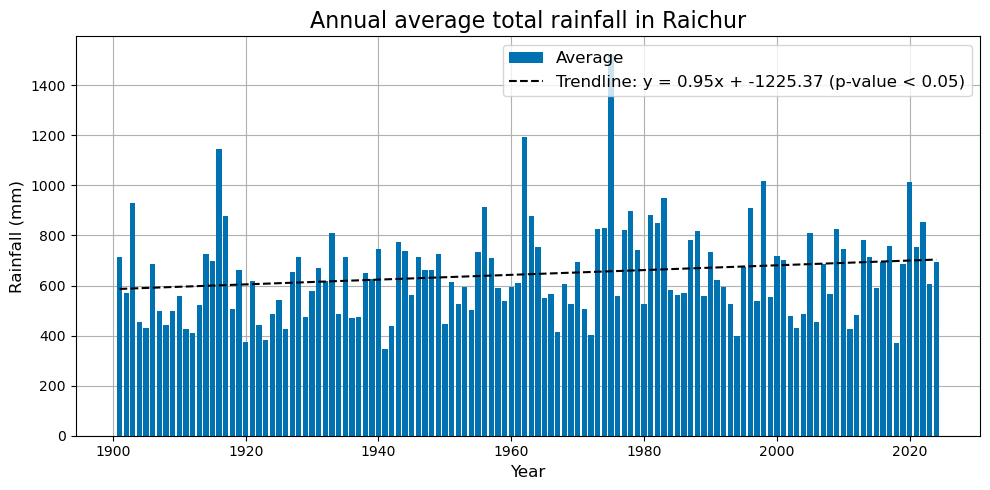

In [69]:
## Plot amount of annual averaged rainfall of all data points of one region 

# Define region and coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Preprocess data
rain_region['date_time'] = pd.to_datetime(rain_region['time'])
rain_region['year'] = rain_region['date_time'].dt.year

# Filter for the region
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
]

# Group and average
yearly_rain_per_point = region_data.groupby(['year', 'lat', 'lon'])['rain'].sum().reset_index()
avg_rain_per_year = yearly_rain_per_point.groupby('year')['rain'].mean()

# Compute trendline and regression
x = avg_rain_per_year.index.astype(int)
y = avg_rain_per_year.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Format p-value smartly
if p_value < 0.01:
    p_str = "p-value ≪ 0.05"
elif p_value < 0.05:
    p_str = "p-value < 0.05"
else:
    p_str = f"p-value = {p_value:.3f}"

# Create trend label with slope and intercept
trend_label = f"Trendline: y = {slope:.2f}x + {intercept:.2f} ({p_str})"

# Plot
plt.figure(figsize=(10, 5))
plt.grid(True, zorder=0)

# Bar and line handles
bar = plt.bar(x, y, color='#0072B2', zorder=2)
line, = plt.plot(x, p(x), color='black', linestyle='--', zorder=3)

# Legend (manual order)
plt.legend(handles=[bar, line], labels=['Average', trend_label], loc='upper right', fontsize=12)

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.title(f"Annual average total rainfall in {region}", fontsize=16)
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"annual_average_total_rainfall_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot figure
plt.show()

# Print p-value
#print(p_value)


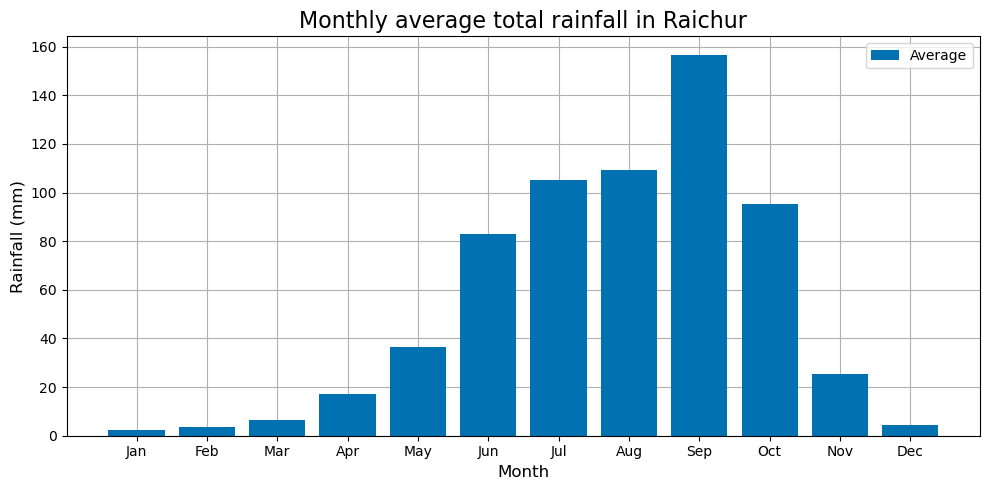

In [59]:
### Plot average amount of monthly rainfall over all data points of one of the regions over all years (1901-2024)

# Define region name and coordinates
#### Raichur coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Filter for region
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
]
# Group by year, month, station, and calculate the mean rainfall per station
monthly_precip = region_data.groupby(['year', 'month', 'lat', 'lon'])['rain'].sum().reset_index()

# Compute average across all stations for each month and year
monthly_avg_all_stations = monthly_precip.groupby(['year', 'month'])['rain'].mean().reset_index()

# Compute final monthly averages across **all years** (this step now correctly averages over stations)
avg_monthly_rain = monthly_avg_all_stations.groupby('month')['rain'].mean()

# Compute the overall yearly average correctly
overall_yearly_avg = avg_monthly_rain.mean()

# Plotting settings
x = np.arange(1, 13)
y = avg_monthly_rain.values
month_labels = [calendar.month_abbr[m] for m in x]

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='#0072B2', label='Average', zorder=2)  # Bars on top
plt.xticks(x, month_labels)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Rainfall (mm)", fontsize = 12)
plt.title(f"Monthly average total rainfall in {region}", fontsize = 16)
plt.grid(True, zorder=1)  # Grid behind bars
plt.legend()
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"monthly_average_total_rainfall_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show figure
plt.show()


T-TEST COMPARISON OF MONTHLY RAINFALL (1901–1930 vs 1995–2024) in Raichur
Month  | Mean_1901–30 | Mean_1995–24 | Diff (mm) |  p-value  | Significant?
--------------------------------------------------------------------------
Jan    |         4.57 |         2.76 |     -1.81 |    0.3781 | No
Feb    |         5.83 |         2.05 |     -3.78 |    0.1115 | No
Mar    |         4.57 |        10.31 |      5.74 |    0.2642 | No
Apr    |        16.32 |        18.44 |      2.12 |    0.6630 | No
May    |        32.90 |        42.75 |      9.85 |    0.1680 | No
Jun    |        74.14 |        91.01 |     16.87 |    0.1210 | No
Jul    |        93.05 |        99.37 |      6.32 |    0.6600 | No
Aug    |        91.29 |       118.02 |     26.73 |    0.0791 | No
Sep    |       147.81 |       162.51 |     14.70 |    0.4249 | No
Oct    |        74.84 |       103.83 |     28.99 |    0.1044 | No
Nov    |        31.54 |        14.13 |    -17.40 |    0.0222 | Yes
Dec    |         5.02 |         2.72 |     -2.30

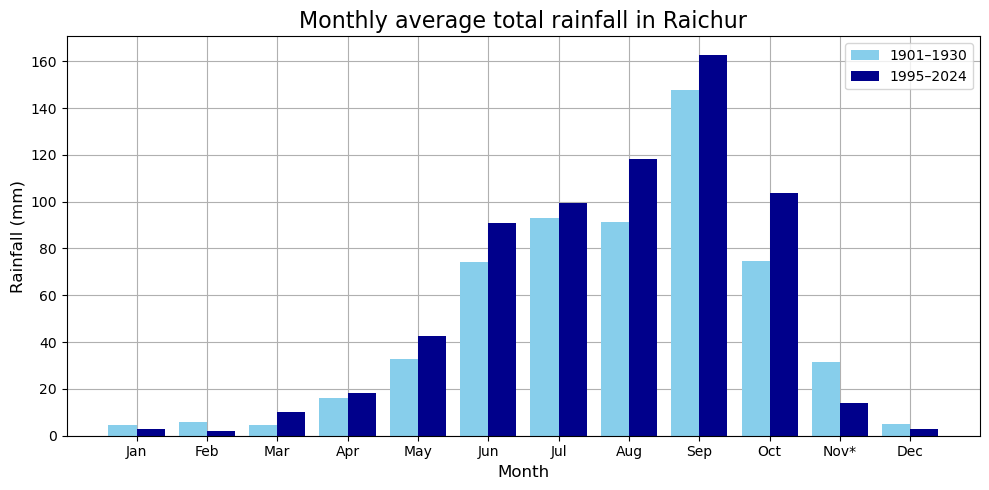

In [60]:
## Plot average amount of monthly rainfall over all data points of one of the regions comparing two periods + statistical test
# Define region and coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Filter region data
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
]

# Group by year, month, and station, then sum rainfall (NO intensity calculation)
monthly_precip = region_data.groupby(['year', 'month', 'lat', 'lon'])['rain'].sum().reset_index()

# Average rainfall over **all stations** for each month of each year
monthly_avg = monthly_precip.groupby(['year', 'month'])['rain'].mean().reset_index()

# Split into two periods
period1 = monthly_avg[(monthly_avg['year'] >= 1901) & (monthly_avg['year'] <= 1930)]
period2 = monthly_avg[(monthly_avg['year'] >= 1995) & (monthly_avg['year'] <= 2024)]

# Prepare table header
print(f"T-TEST COMPARISON OF MONTHLY RAINFALL (1901–1930 vs 1995–2024) in {region}")
print("Month  | Mean_1901–30 | Mean_1995–24 | Diff (mm) |  p-value  | Significant?")
print("--------------------------------------------------------------------------")

# Store significant month numbers
significant_month_nums = []

# Loop over months
for m in range(1, 13):
    data_p1 = period1[period1['month'] == m]['rain']
    data_p2 = period2[period2['month'] == m]['rain']

    mean_p1 = data_p1.mean()
    mean_p2 = data_p2.mean()
    diff = mean_p2 - mean_p1

    # Perform t-test (independent samples)
    t_stat, p_val = ttest_ind(data_p2, data_p1, equal_var=False, nan_policy='omit')
    signif = "Yes" if p_val < 0.05 else "No"

    if p_val < 0.05:
        significant_month_nums.append(m)

    # Print summary
    print(f"{calendar.month_abbr[m]:<7}| {mean_p1:12.2f} | {mean_p2:12.2f} | {diff:9.2f} | {p_val:9.4f} | {signif}")

# Compute monthly averages for both periods
monthly_avg_p1 = period1.groupby('month')['rain'].mean()
monthly_avg_p2 = period2.groupby('month')['rain'].mean()

# Define x-axis values
x = np.arange(1, 13)
bar_width = 0.4

# Create x-tick labels with asterisks for significant months
month_labels = [
    f"{calendar.month_abbr[m]}*" if m in significant_month_nums else calendar.month_abbr[m]
    for m in range(1, 13)
]

# Create the figure
plt.figure(figsize=(10, 5))

# Plot bars for both periods
plt.bar(x - bar_width/2, monthly_avg_p1.values, width=bar_width, label='1901–1930', color='skyblue', zorder=2)
plt.bar(x + bar_width/2, monthly_avg_p2.values, width=bar_width, label='1995–2024', color='darkblue', zorder=2)

# Apply the x-tick labels with significance asterisks
plt.xticks(x, month_labels)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.title(f"Monthly average total rainfall in {region}", fontsize = 16)   #\n* indicates p < 0.05")
plt.legend()
plt.grid(True, zorder=1)
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"monthly_average_rainfall_periods_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show figure
plt.show()


In [ ]:
##### Extra plots #####

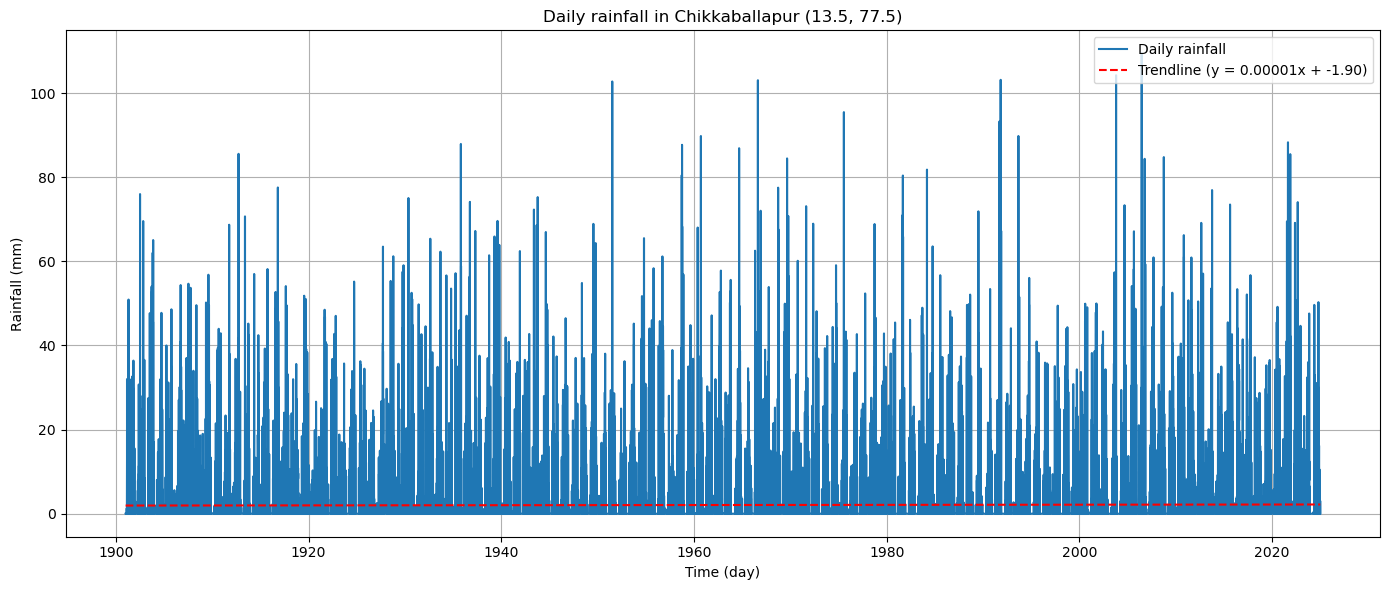

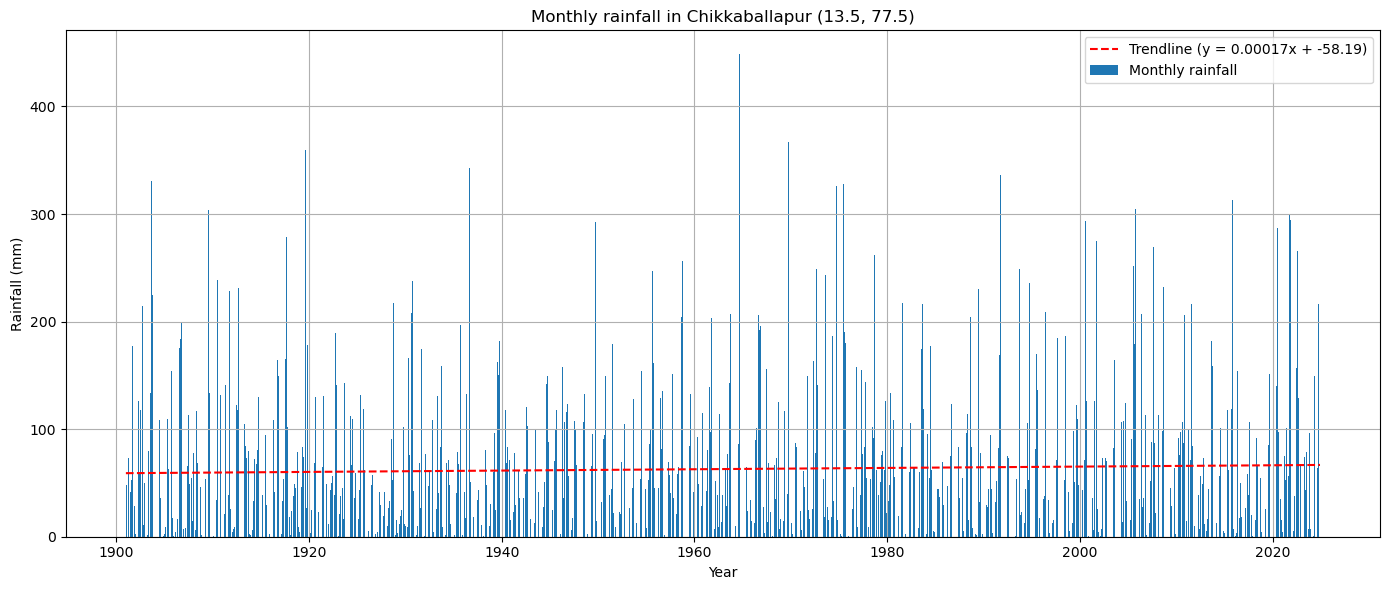

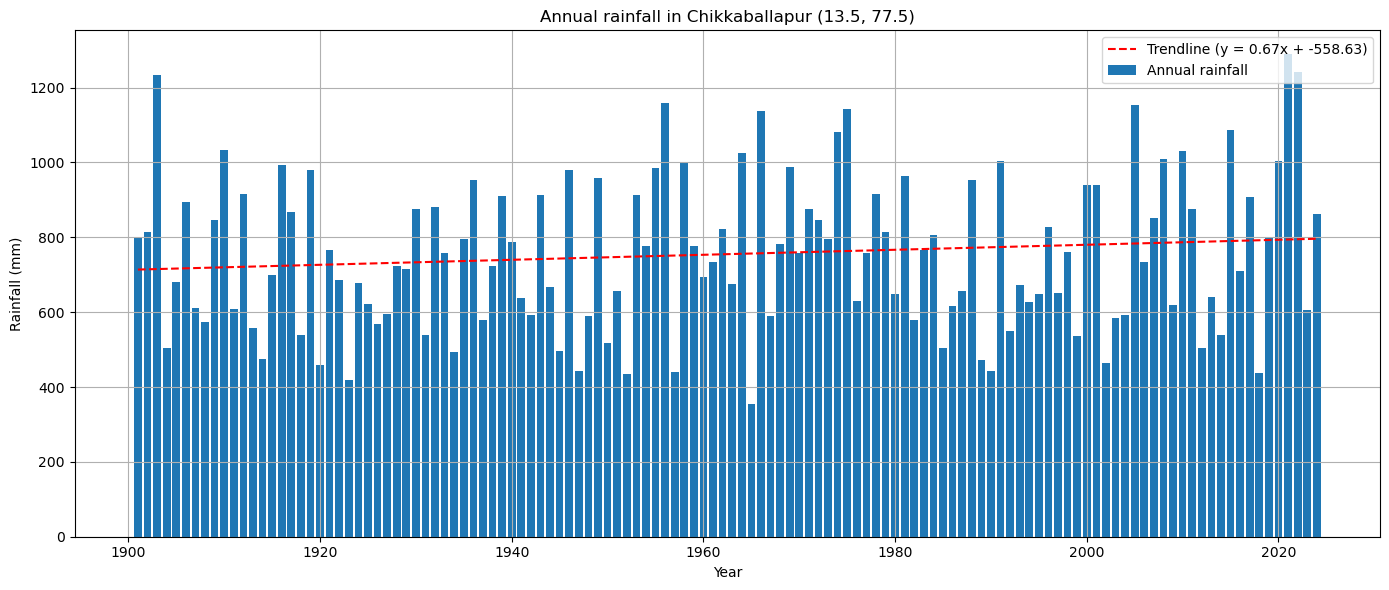

In [52]:
### Plot total rain against years of one of the regions for 1 IMD data point (daily, monthly and yearly values) with trendlines
# Available coordinates for Raichur: (16.25, 76.5), (16.25, 76.75), (16.25, 77), (16.5, 76.5), (16.5, 76.75), (16.5, 77)
# Available coordinates for Chikkaballapur: (13.5, 77.5), (13.5, 77.75), (13.5, 78), (13.75, 77.75), (13.75, 78)

# Filter the data for the specific location (see available coordinates)
# Raichur 
#region = 'Raichur'  ### Chikkaballapur or Raichur
#lat = 16.25
#lon = 76.5
#lat_ = '16.25'
#lon_ = '76.5'

# Chikkaballapur
region = 'Chikkaballapur'  ### Chikkaballapur or Raichur
lat = 13.5
lon = 77.5
lat_ = '13.5'
lon_ = '77.5'
filtered = rain_region[(rain_region['lat'] == lat) & (rain_region['lon'] == lon)]

# Ensure it's a copy to avoid SettingWithCopyWarning
filtered = filtered.copy()

# DAILY RAINFALL PLOT
# Convert datetime index to numerical values for the trendline
x_daily = filtered.index.map(pd.Timestamp.toordinal)
y_daily = filtered['rain'].values
z_daily = np.polyfit(x_daily, y_daily, 1)
p_daily = np.poly1d(z_daily)
trendline_daily = p_daily(x_daily)

# Plot daily rainfall with trendline
plt.figure(figsize=(14, 6))
plt.plot(filtered.index, filtered['rain'], label=f'Daily rainfall')
plt.plot(filtered.index, trendline_daily, color='red', linestyle='--',
         label=f'Trendline (y = {z_daily[0]:.5f}x + {z_daily[1]:.2f})')
plt.xlabel('Time (day)')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily rainfall in {region} ({lat_}, {lon_})')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# MONTHLY AVERAGE RAINFALL PLOT
# Add year and month columns
filtered['year'] = filtered.index.year
filtered['month'] = filtered.index.month

# Group and calculate total rainfall per month
monthly_sum_rain = filtered.groupby(['year', 'month'])['rain'].sum().reset_index()

# Create a datetime object for each year-month for plotting
monthly_sum_rain['date'] = pd.to_datetime(monthly_sum_rain[['year', 'month']].assign(day=1))

# Trendline for monthly data
x = monthly_sum_rain['date'].map(pd.Timestamp.toordinal)
y = monthly_sum_rain['rain']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
trendline = p(x)

# Plot monthly total rainfall and trendline
plt.figure(figsize=(14, 6))
plt.bar(monthly_sum_rain['date'], y, width=20, label=f'Monthly rainfall')
plt.plot(monthly_sum_rain['date'], trendline, color='red', linestyle='--',
         label=f'Trendline (y = {z[0]:.5f}x + {z[1]:.2f})')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Monthly rainfall in {region} ({lat_}, {lon_})')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# YEARLY AVERAGE RAINFALL PLOT
# Add year column
filtered['year'] = filtered.index.year

# Group and calculate average rainfall per year
yearly_sum_rain = filtered.groupby('year')['rain'].sum().reset_index()

# Trendline for yearly data
x = yearly_sum_rain['year']
y = yearly_sum_rain['rain']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
trendline = p(x)

# Plot yearly average rainfall and trendline
plt.figure(figsize=(14, 6))
plt.bar(x, y, label=f'Annual rainfall')
plt.plot(x, trendline, color='red', linestyle='--',
         label=f'Trendline (y = {z[0]:.2f}x + {z[1]:.2f})')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Annual rainfall in {region} ({lat_}, {lon_})')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


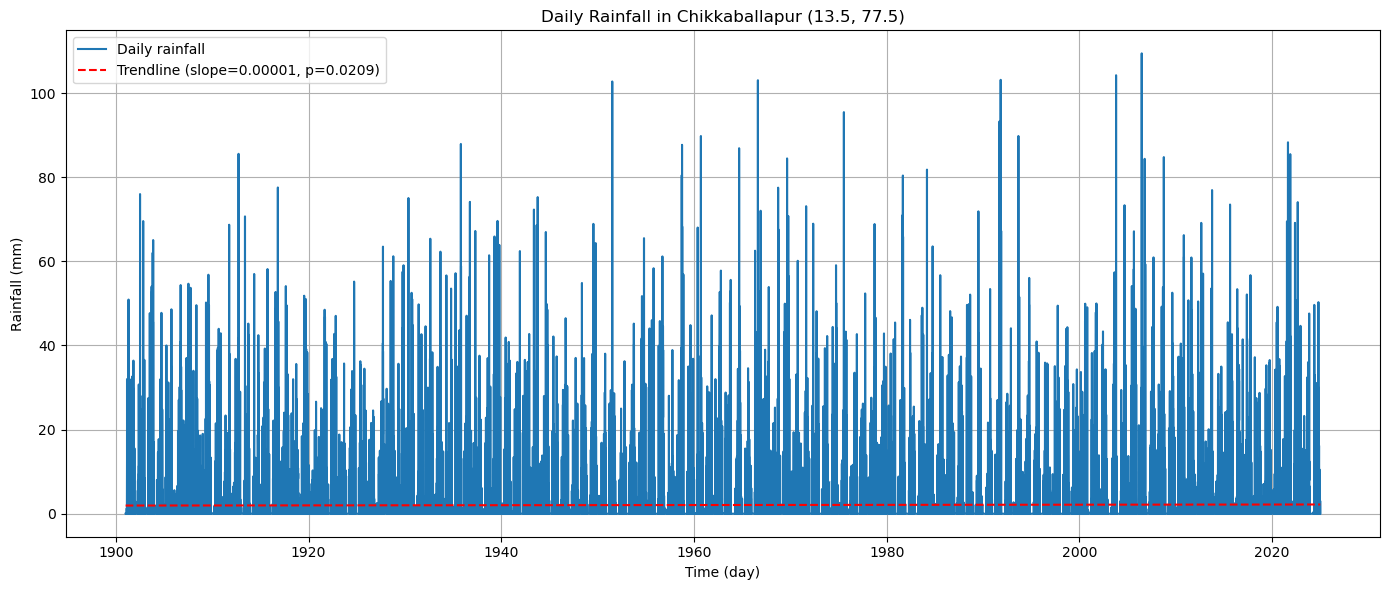


DAILY Linear Regression (Chikkaballapur):
  Slope: 0.00001 mm/day
  Intercept: -1.90
  R²: 0.0001
  p-value: 0.0209
  Std Error: 0.00000


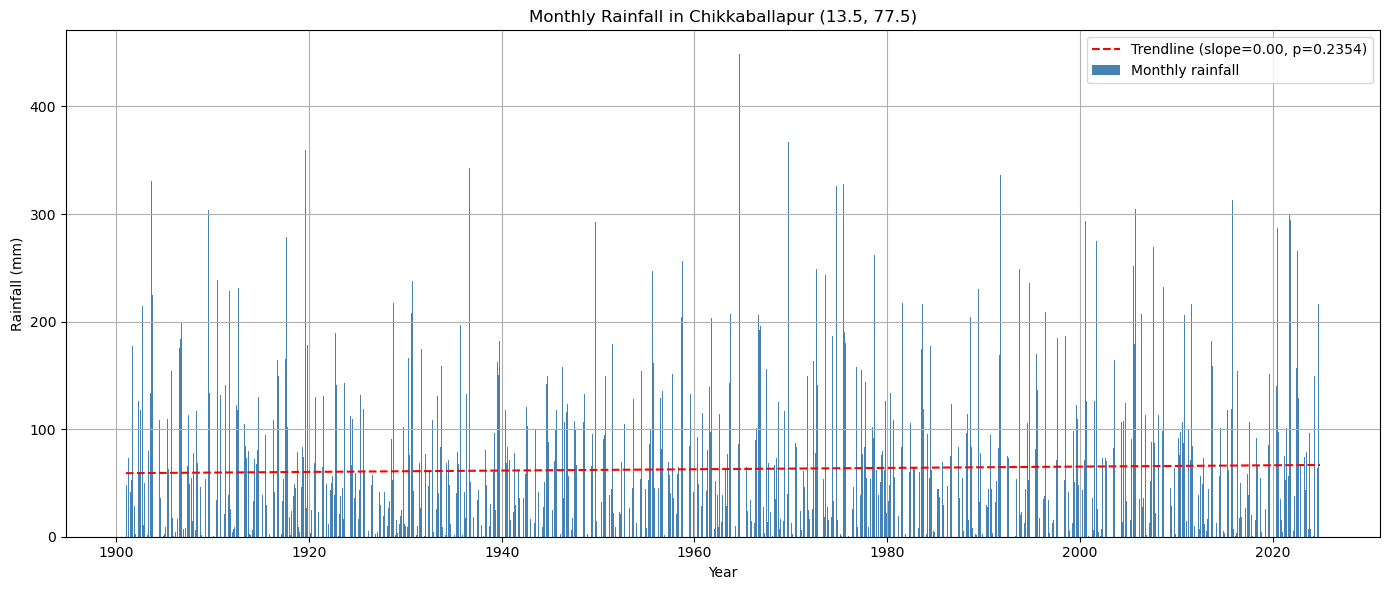


MONTHLY Linear Regression (Chikkaballapur):
  Slope: 0.00 mm/month
  Intercept: -58.19
  R²: 0.0009
  p-value: 0.2354
  Std Error: 0.00


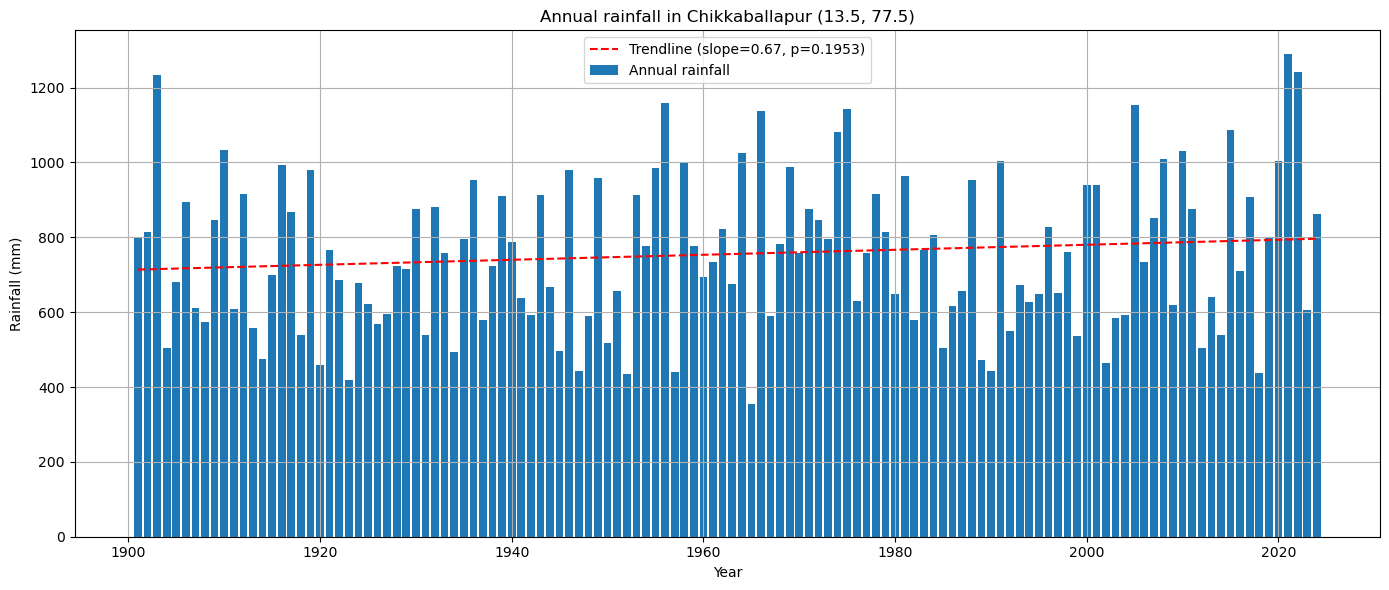


YEARLY Linear Regression (Chikkaballapur):
  Slope: 0.67 mm/year
  Intercept: -558.63
  R²: 0.0137
  p-value: 0.1953
  Std Error: 0.51

Average annual rainfall (mm): 754.95

Average monthly rainfall (mm):
January  : 3.24
February : 5.49
March    : 9.13
April    : 30.67
May      : 75.12
June     : 66.72
July     : 94.24
August   : 110.95
September: 152.39
October  : 140.30
November : 55.12
December : 11.58

Average daily rainfall (mm): 2.06


In [53]:
### Plot total rain against years of one of the regions for 1 IMD data point (daily, monthly and yearly values) with trendlines
### and statistical tests
# Available coordinates for Raichur: (16.25, 76.5), (16.25, 76.75), (16.25, 77), (16.5, 76.5), (16.5, 76.75), (16.5, 77)
# Available coordinates for Chikkaballapur: (13.5, 77.5), (13.5, 77.75), (13.5, 78), (13.75, 77.75), (13.75, 78)


# Filter the data for the specific location
# Raichur
#region = 'Raichur'  ### Chikkaballapur or Raichur
#lat = 16.25
#lon = 76.5
#lat_ = '16.25'
#lon_ = '76.5'

# Chikkaballapur
region = 'Chikkaballapur'  ### Chikkaballapur or Raichur
lat = 13.5
lon = 77.5
lat_ = '13.5'
lon_ = '77.5'
filtered = rain_region[(rain_region['lat'] == lat) & (rain_region['lon'] == lon)].copy()

### DAILY RAINFALL
x_daily = filtered.index.map(pd.Timestamp.toordinal)
y_daily = filtered['rain'].values
slope_d, intercept_d, r_d, p_d, std_err_d = linregress(x_daily, y_daily)
trendline_daily = slope_d * x_daily + intercept_d

# Plot
plt.figure(figsize=(14, 6))
plt.plot(filtered.index, y_daily, label='Daily rainfall')
plt.plot(filtered.index, trendline_daily, color='red', linestyle='--',
         label=f'Trendline (slope={slope_d:.5f}, p={p_d:.4f})')
plt.xlabel('Time (day)')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall in {region} ({lat_}, {lon_})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nDAILY Linear Regression ({region}):")
print(f"  Slope: {slope_d:.5f} mm/day")
print(f"  Intercept: {intercept_d:.2f}")
print(f"  R²: {r_d**2:.4f}")
print(f"  p-value: {p_d:.4f}")
print(f"  Std Error: {std_err_d:.5f}")

### MONTHLY RAINFALL
filtered['year'] = filtered.index.year
filtered['month'] = filtered.index.month
monthly_sum_rain = filtered.groupby(['year', 'month'])['rain'].sum().reset_index()
monthly_sum_rain['date'] = pd.to_datetime(monthly_sum_rain[['year', 'month']].assign(day=1))

x_monthly = monthly_sum_rain['date'].map(pd.Timestamp.toordinal)
y_monthly = monthly_sum_rain['rain'].values
slope_m, intercept_m, r_m, p_m, std_err_m = linregress(x_monthly, y_monthly)
trendline_monthly = slope_m * x_monthly + intercept_m

# Plot
plt.figure(figsize=(14, 6))
plt.bar(monthly_sum_rain['date'], y_monthly, width=20, label='Monthly rainfall', color='steelblue')
plt.plot(monthly_sum_rain['date'], trendline_monthly, color='red', linestyle='--',
         label=f'Trendline (slope={slope_m:.2f}, p={p_m:.4f})')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Monthly Rainfall in {region} ({lat_}, {lon_})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nMONTHLY Linear Regression ({region}):")
print(f"  Slope: {slope_m:.2f} mm/month")
print(f"  Intercept: {intercept_m:.2f}")
print(f"  R²: {r_m**2:.4f}")
print(f"  p-value: {p_m:.4f}")
print(f"  Std Error: {std_err_m:.2f}")

### YEARLY RAINFALL
yearly_sum_rain = filtered.groupby('year')['rain'].sum().reset_index()
x_yearly = yearly_sum_rain['year']
y_yearly = yearly_sum_rain['rain']
slope_y, intercept_y, r_y, p_y, std_err_y = linregress(x_yearly, y_yearly)
trendline_yearly = slope_y * x_yearly + intercept_y

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x_yearly, y_yearly, label='Annual rainfall')
plt.plot(x_yearly, trendline_yearly, color='red', linestyle='--',
         label=f'Trendline (slope={slope_y:.2f}, p={p_y:.4f})')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Annual rainfall in {region} ({lat_}, {lon_})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nYEARLY Linear Regression ({region}):")
print(f"  Slope: {slope_y:.2f} mm/year")
print(f"  Intercept: {intercept_y:.2f}")
print(f"  R²: {r_y**2:.4f}")
print(f"  p-value: {p_y:.4f}")
print(f"  Std Error: {std_err_y:.2f}")

### ADDITIONAL ANALYSIS: AVERAGE ANNUAL, MONTHLY, AND DAILY RAINFALL

# Average annual rainfall
annual_avg = monthly_sum_rain.groupby('year')['rain'].sum()
print(f"\nAverage annual rainfall (mm): {annual_avg.mean():.2f}")

# Average monthly rainfall
monthly_mean = monthly_sum_rain.groupby('month')['rain'].mean()
print("\nAverage monthly rainfall (mm):")
for month in range(1, 13):
    print(f"{calendar.month_name[month]:<9}: {monthly_mean.get(month, 0):.2f}")

# Calculate average daily rainfall
monthly_sum_rain['days_in_month'] = monthly_sum_rain.apply(
    lambda row: calendar.monthrange(int(row['year']), int(row['month']))[1], axis=1)
monthly_sum_rain['daily_rain'] = monthly_sum_rain['rain'] / monthly_sum_rain['days_in_month']
daily_avg = monthly_sum_rain['daily_rain'].mean()
print(f"\nAverage daily rainfall (mm): {daily_avg:.2f}")


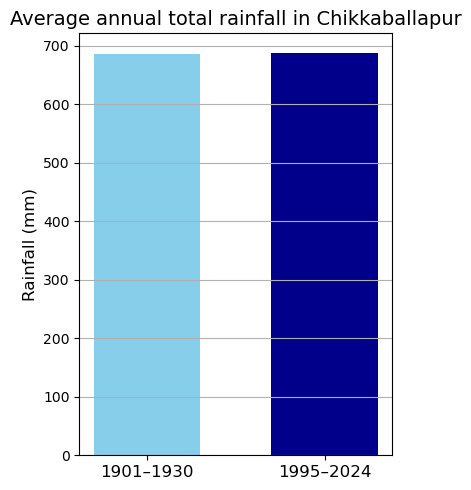


Average annual rainfall (1901–1930): 686.09 mm
Average annual rainfall (1995–2024): 687.03 mm
Difference: 0.94 mm
T-test p-value: 0.9855


In [54]:
## Plot amount of total annual averaged rainfall of all data points of one region and statistal test

# Choose region
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Define periods
period1 = (1901, 1930)
period2 = (1995, 2024)

# --- Data Preprocessing ---
rain_region['date_time'] = pd.to_datetime(rain_region['time'])
rain_region['year'] = rain_region['date_time'].dt.year

# Filter by region
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
]

# Group by year, lat, lon and sum rainfall (total annual per grid point)
annual_rain = region_data.groupby(['year', 'lat', 'lon'])['rain'].sum().reset_index()

# Average across grid points for each year
annual_avg = annual_rain.groupby('year')['rain'].mean().reset_index()

# Filter data for the two periods
annual_avg_p1 = annual_avg[(annual_avg['year'] >= period1[0]) & (annual_avg['year'] <= period1[1])]
annual_avg_p2 = annual_avg[(annual_avg['year'] >= period2[0]) & (annual_avg['year'] <= period2[1])]

# Average annual rainfall over all years in each period
mean_annual_p1 = annual_avg_p1['rain'].mean()
mean_annual_p2 = annual_avg_p2['rain'].mean()

# --- Plotting ---
x = np.arange(2)
bar_width = 0.6
colors = ['skyblue', 'darkblue']

plt.figure(figsize=(4, 5))
plt.bar(x, [mean_annual_p1, mean_annual_p2], width=bar_width, color=colors)

plt.xticks(x, [f"{period1[0]}–{period1[1]}", f"{period2[0]}–{period2[1]}"], size=12)
plt.ylabel("Rainfall (mm)", size=12)
plt.title(f"Average annual total rainfall in {region}", size=14) # ({len(region_coords)} IMD grid points)")
plt.grid(axis='y')
plt.tight_layout()

# Save figure
#output_folder = r"C:/     # Put your own output folder directory
#filename = f"annual_total_periods_rainfall_{region.lower()}.png"
#output_path = os.path.join(output_folder, filename)
#plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot figure
plt.show()

# Print average annual rainfall and difference
diff = mean_annual_p2 - mean_annual_p1
print(f"\nAverage annual rainfall ({period1[0]}–{period1[1]}): {mean_annual_p1:.2f} mm")
print(f"Average annual rainfall ({period2[0]}–{period2[1]}): {mean_annual_p2:.2f} mm")
print(f"Difference: {diff:.2f} mm")

# Perform t-test (two-sample t-Test (Welch's t-test))
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(annual_avg_p1['rain'], annual_avg_p2['rain'], equal_var=False, nan_policy='omit')
significant = "Yes" if p_val < 0.05 else "No"
print(f"T-test p-value: {p_val:.4f}")  #→ Significant? {significant}")



In [ ]:
##### Coordinates Raichur and Chikkaballapur #####

In [ ]:
########## Do not run this code, only copy the parts for the coordinates you need ###########
#### Raichur coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

#### Chikkaballapur coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates
